--2021-07-24 02:38:53--  https://bit.ly/fruits_300_data
Resolving bit.ly (bit.ly)... 67.199.248.10, 67.199.248.11
Connecting to bit.ly (bit.ly)|67.199.248.10|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy [following]
--2021-07-24 02:38:53--  https://github.com/rickiepark/hg-mldl/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy [following]
--2021-07-24 02:38:54--  https://raw.githubusercontent.com/rickiepark/hg-mldl/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... conne

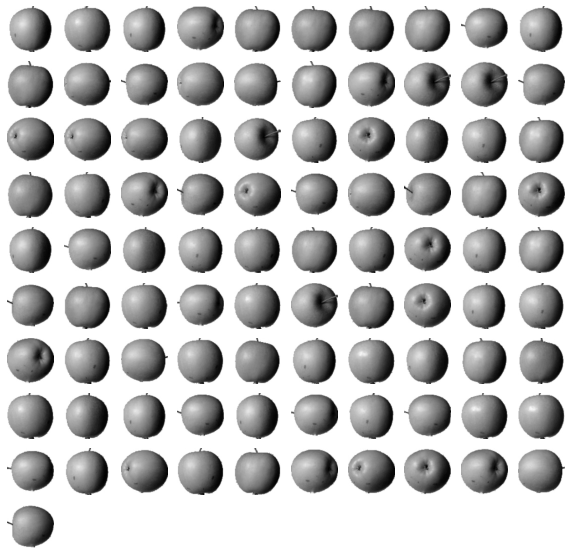

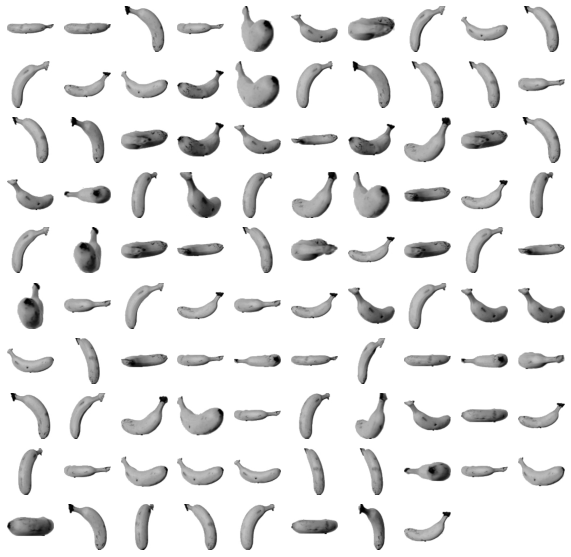

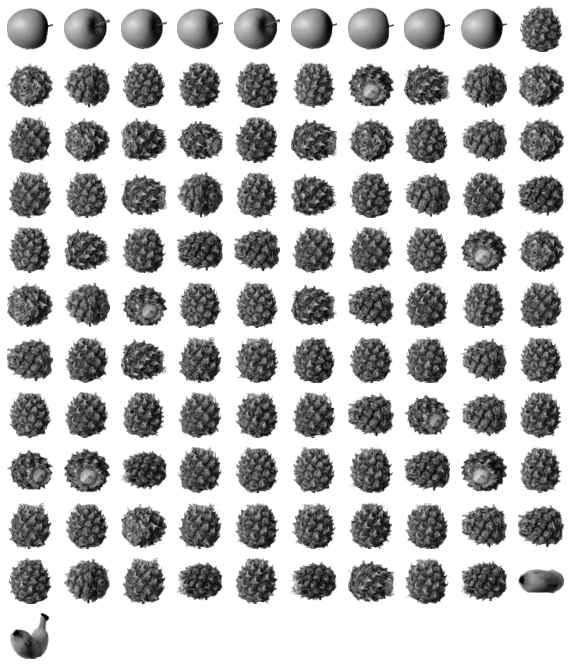

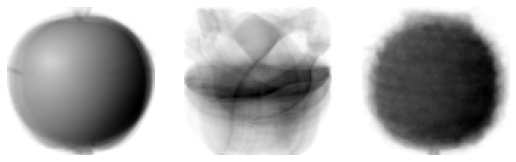

[[5267.70439881 8837.37750892 3393.8136117 ]]
[2]


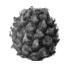

3


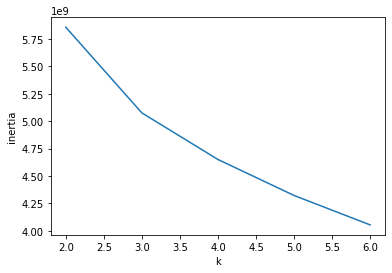

In [18]:
#KMeans클래스
!wget https://bit.ly/fruits_300_data -O fruits_300.npy

import numpy as np
fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

print(km.labels_)

print(np.unique(km.labels_, return_counts=True))

import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
  n = len(arr) # n : 샘플개수
  rows = int(np.ceil(n/10)) # 한 줄에 10개씩 이미지를 그림. 샘플 개수를 10으로 나눠 전체 행 개수 계산
  cols = n if rows < 2 else 10 # 행이 1개이면 열의 개수는 샘플 개수. 그렇지 않으면 10개
  fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)
  for i in range(rows):
    for j in range(cols):
      if i*10 + j < n:
        axs[i,j].imshow(arr[i*10 + j], cmap='gray_r')
      axs[i, j].axis('off')
  plt.show()

draw_fruits(fruits[km.labels_==0])

draw_fruits(fruits[km.labels_==1])

draw_fruits(fruits[km.labels_==2])

#클러스터 중심
draw_fruits(km.cluster_centers_.reshape(-1,100,100), ratio=3)

print(km.transform(fruits_2d[100:101]))

print(km.predict(fruits_2d[100:101]))

draw_fruits(fruits[100:101])

print(km.n_iter_)

#최적의 k 찾기
inertia = []
for k in range(2,7):
  km = KMeans(n_clusters=k, random_state=42)
  km.fit(fruits_2d)
  inertia.append(km.inertia_)
plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()